# Supply Chain Management


#
#### OVERVIEW
A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two
years back. Their higher management has noticed that there is a mismatch in the demand and
supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in
inventory cost and ultimately loss to the company. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire country.
Create a model using : [Train dataset](https://drive.google.com/file/d/1eodz3D2p9HZYKzEJYBpyuDGek-BH0dbY/view)

#
#### GOALS
The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it using : [Test dataset](https://drive.google.com/file/d/11V08gQiXAHHz2-dy3FX6pbY21I9x9wle/view)

#

### Data Dictionary
#####

| Variable                    | Description                                                   |
|-----------------------------|---------------------------------------------------------------|
| Ware_house_ID               | Unique Warehouse id where product is prepared for dispatch.    |
| WH_Manager_ID               | Manager Id present in the warehouse.                           |
| zone                        | Zone of the Warehouse.                                        |
| WH_regional_zone            | Regional Zone of the warehouse.                                |
| num_refill_req_l3m          | Reﬁlling request received by the warehouse in the last 3 months.|
| transport_issue_l1y         | No. of transport issued for warehouse in last 1 year.         |
| Competitor_in_mkt           | No. of competitors in the market.                              |
| retail_shop_num             | Number of retail shops who sell noodles produced by the warehouse.|
| wh_owner_type               | The warehouse is owned by the company or it is on rent.        |
| distributor_num             | No. of distributor who works between warehouse and retail shops.|
| flood_impacted              | Is the warehouse in a ﬂood impacted area or not.              |
| flood_proof                 | Flood_proof: Warehouse is having ﬂood proof indicator.         |
| electric_supply             | Does the warehouse have proper electric supply along with some power backup.|
| dist_from_hub               | Distance from the warehouse to production hub.                 |
| workers_num                 | Number of workers in the warehouse.                            |
| wh_est_year                 | Warehouse establishment year.                                  |
| storage_issue_reported_l3m  | Storage issues reported by the warehouse in the last 3 months. |
| temp_reg_mach               | Warehouse having temperature regulating machine indicator or not.|
| approved_wh_govt_certificate| Type of approval warehouse having been issued by government.    |
| wh_breakdown_l3m            | Number of times the warehouse faces the breakdown in the last 3 months.|
| product_wg_ton              | Product weight.                                                |


In [1]:
# Data manipulation,analysis and Visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Metrics for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
# Machine learning algorithm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
# Preprocessing and feature scaling
from sklearn.preprocessing import LabelEncoder
from sty import fg, bg, ef, rs

##### Loading Training Data

In [2]:
df=pd.read_csv('supply_train.csv')
df.head(8)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,...,0,241,23.0,NaN,18,0,C,6,24,24093


### Exploratory Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [4]:
# Summary statistics
df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64


Filling the Warehouse establishment year null values by redistributing them among the existing years ensures a balanced representation. Any alternative method like dropping or filling with statistical measures could skew the historical distribution, impacting accurate trend analysis.

In [6]:
year=df['wh_est_year'].value_counts().sort_index(ascending=False)
print(year)
print('---------------------------------------------------------------------')
print('''Displaying the count of warehouses established each year in descending order.
the earliest recorded year is 1996, and the most recent is 2023''')

wh_est_year
2023.0     91
2022.0    212
2021.0    336
2020.0    337
2019.0    328
2018.0    327
2017.0    329
2016.0    342
2015.0    340
2014.0    365
2013.0    323
2012.0    331
2011.0    314
2010.0    335
2009.0    319
2008.0    334
2007.0    352
2006.0    343
2005.0    330
2004.0    357
2003.0    314
2002.0    363
2001.0    330
2000.0    387
1999.0    323
1998.0    346
1997.0    226
1996.0    126
Name: count, dtype: int64
---------------------------------------------------------------------
Displaying the count of warehouses established each year in descending order.
the earliest recorded year is 1996, and the most recent is 2023


In [7]:
import random
# Get the indices of remaining null values
null_indx = df[df['wh_est_year'].isnull()].index

for index in null_indx:
    r_year = random.choice(range(1996, 2024))  
    df.at[index, 'wh_est_year'] = r_year

In [8]:
df['wh_est_year'].value_counts().sort_index(ascending=False)

wh_est_year
2023.0    407
2022.0    504
2021.0    635
2020.0    627
2019.0    593
2018.0    604
2017.0    627
2016.0    647
2015.0    629
2014.0    659
2013.0    585
2012.0    593
2011.0    612
2010.0    587
2009.0    601
2008.0    612
2007.0    616
2006.0    637
2005.0    606
2004.0    651
2003.0    582
2002.0    626
2001.0    608
2000.0    635
1999.0    623
1998.0    626
1997.0    490
1996.0    398
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Unnamed: 0                        0
Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     667
wh_est_year                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    599
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [10]:
# fill null values of the worker number with mean
df['workers_num']=df['workers_num'].fillna(df['workers_num'].mean())

In [11]:
# fill null values of the approved_wh_govt_certificate with mode 
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(
    df['approved_wh_govt_certificate'].mode()[0])

In [12]:
df.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [13]:
df=df.drop(columns=["Unnamed: 0",'Ware_house_ID'])
df

,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,...,1,91,29.00000,2001.0,13,0,A,5,15,17115
1,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,...,1,210,31.00000,2015.0,4,0,A,3,17,5074
2,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,...,0,161,37.00000,2021.0,17,0,A,6,22,23137
3,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,...,0,103,21.00000,2003.0,17,1,A+,3,27,22115
4,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,...,1,112,25.00000,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,Rented,...,0,240,19.00000,2009.0,14,0,B+,5,23,16094
16616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,Company Owned,...,1,164,30.00000,2004.0,17,0,B+,6,24,21113
16617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,Company Owned,...,1,211,24.00000,2003.0,24,1,B,5,29,28117
16618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,Rented,...,1,119,28.91149,2007.0,16,0,A,5,15,21103


In [14]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.518652,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.683065,7.823921,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [15]:
df.duplicated().sum() 

0

In [16]:
df=df.drop(columns=['WH_Manager_ID'])
df  

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.00000,2001.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.00000,2015.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.00000,2021.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.00000,2003.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.00000,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,Urban,Large,West,Zone 6,3,1,6,4779,Rented,70,...,0,240,19.00000,2009.0,14,0,B+,5,23,16094
16616,Urban,Large,North,Zone 5,2,0,2,5718,Company Owned,26,...,1,164,30.00000,2004.0,17,0,B+,6,24,21113
16617,Rural,Large,North,Zone 6,5,0,4,4514,Company Owned,50,...,1,211,24.00000,2003.0,24,1,B,5,29,28117
16618,Rural,Small,West,Zone 6,3,2,3,5829,Rented,59,...,1,119,28.91149,2007.0,16,0,A,5,15,21103


In [17]:
uniqu=df.nunique()
uniqu

Location_type                      2
WH_capacity_size                   3
zone                               4
WH_regional_zone                   6
num_refill_req_l3m                 9
transport_issue_l1y                6
Competitor_in_mkt                 12
retail_shop_num                 4356
wh_owner_type                      2
distributor_num                   56
flood_impacted                     2
flood_proof                        2
electric_supply                    2
dist_from_hub                    217
workers_num                       61
wh_est_year                       28
storage_issue_reported_l3m        37
temp_reg_mach                      2
approved_wh_govt_certificate       5
wh_breakdown_l3m                   7
govt_check_l3m                    32
product_wg_ton                  4248
dtype: int64

In [18]:
# categorical columns 
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
cat_columns

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [19]:
for col in cat_columns:
    print('=======================')
    print(df[col].value_counts())

Location_type
Rural    15272
Urban     1348
Name: count, dtype: int64
WH_capacity_size
Large    6743
Mid      6691
Small    3186
Name: count, dtype: int64
zone
North    6800
West     5320
South    4223
East      277
Name: count, dtype: int64
WH_regional_zone
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: count, dtype: int64
wh_owner_type
Company Owned    8975
Rented           7645
Name: count, dtype: int64
approved_wh_govt_certificate
C     4237
B+    3260
B     3220
A     3132
A+    2771
Name: count, dtype: int64


In [20]:
num_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_columns

['num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'dist_from_hub',
 'workers_num',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'product_wg_ton']

In [21]:
for col in num_columns:
    print('=======================')
    print(df[col].value_counts())

num_refill_req_l3m
8    2032
3    1984
5    1967
7    1941
0    1900
4    1885
6    1857
1    1835
2    1219
Name: count, dtype: int64
transport_issue_l1y
0    10094
1     3072
2     1437
3     1272
4      508
5      237
Name: count, dtype: int64
Competitor_in_mkt
2     5790
3     4702
4     4438
5      825
6      375
1      291
7      136
8       49
10       6
9        6
12       1
0        1
Name: count, dtype: int64
retail_shop_num
4808    18
5022    17
4367    17
4611    16
4439    16
        ..
7176     1
3483     1
8522     1
7570     1
7347     1
Name: count, Length: 4356, dtype: int64
distributor_num
21    328
69    323
49    322
35    321
59    319
63    319
47    318
36    317
37    315
41    314
40    314
28    313
44    311
31    311
24    309
42    307
38    307
57    305
30    304
54    303
50    303
65    302
29    302
48    301
23    300
64    299
56    299
22    298
20    297
15    296
62    295
18    293
55    292
26    292
33    291
67    290
66    290
52    289
16  

In [22]:
num_columns

['num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'dist_from_hub',
 'workers_num',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'product_wg_ton']

In [23]:
pivot_avg_refill_by_zone = df.pivot_table(index=['zone'], values='num_refill_req_l3m', aggfunc=sum)
pivot_avg_refill_by_zone

,num_refill_req_l3m
zone,
East,1148
North,27661
South,17453
West,22323


In [24]:
pivot_multiple_agg = df.pivot_table(index='zone', values='num_refill_req_l3m', aggfunc=['mean', 'sum'])
pivot_multiple_agg


,mean,sum
,num_refill_req_l3m,num_refill_req_l3m
zone,,
East,4.144404,1148
North,4.067794,27661
South,4.132844,17453
West,4.196053,22323


In [25]:
pivot_sum_by_zone_capacity = df.pivot_table(index='zone', columns='WH_capacity_size', 
                         values='num_refill_req_l3m', aggfunc='sum', fill_value=0)
pivot_sum_by_zone_capacity



WH_capacity_size,Large,Mid,Small
zone,,,
East,167,649,332
North,14843,7982,4836
South,4326,8897,4230
West,8421,10272,3630


In [26]:
pivot_count_combinations = df.pivot_table(index='wh_owner_type', columns='approved_wh_govt_certificate',
                        values='num_refill_req_l3m', aggfunc='count', fill_value=0)
pivot_count_combinations


approved_wh_govt_certificate,A,A+,B,B+,C
wh_owner_type,,,,,
Company Owned,1679,1517,1761,1725,2293
Rented,1453,1254,1459,1535,1944


In [27]:
# number of refilli req from the wearhosuse yearly bse
refill_req = df.pivot_table(index='wh_est_year', columns='zone', values='num_refill_req_l3m',
                            aggfunc='sum', fill_value=0)
refill_req

zone,East,North,South,West
wh_est_year,,,,
1996.0,17,609,362,430
1997.0,12,779,512,595
1998.0,47,1054,602,904
1999.0,39,1111,611,799
2000.0,52,1067,689,899
2001.0,46,1108,575,803
2002.0,74,1045,805,819
2003.0,53,941,657,759
2004.0,25,1128,643,968


In [28]:
# number of breadkdown yearly  
refill_req = df.pivot_table(index='wh_est_year', columns='zone', values='wh_breakdown_l3m',
                            aggfunc='sum', fill_value=0)
refill_req

zone,East,North,South,West
wh_est_year,,,,
1996.0,14,605,349,449
1997.0,11,784,491,532
1998.0,36,945,565,856
1999.0,36,1051,547,701
2000.0,36,1004,677,777
2001.0,42,975,541,739
2002.0,60,959,648,722
2003.0,47,861,613,625
2004.0,21,987,598,875


### Creation of New Attributes

In [29]:
#Create a new feature age indicating how old each warehouse is based on the whearhouse established year
df['wh_age'] = 2023 - df['wh_est_year']
df[['wh_est_year', 'wh_age']].head()

,wh_est_year,wh_age
0,2001.0,22.0
1,2015.0,8.0
2,2021.0,2.0
3,2003.0,20.0
4,2009.0,14.0


In [30]:
#showing the ratio of retail_shop_num to workers_num
df['workr_ratio'] = df['retail_shop_num'] / df['workers_num']
df[['workr_ratio']].head()

,workr_ratio
0,160.379310
1,200.548387
2,116.378378
3,285.714286
4,189.600000


In [31]:
df['loc_electr'] = df['electric_supply'].astype(str) + '_' + df['Location_type']
df['loc_electr'].value_counts()

loc_electr
1_Rural    10019
0_Rural     5253
1_Urban      879
0_Urban      469
Name: count, dtype: int64

in Rural location 10019  wh have only electric supply the rest 5253 wh does't have electric supply 
and urban area 879 wh have only electric supply and the rest 469 wh doesj't have electeric supply 

In [32]:
breakdowns_rural = df[df['Location_type'] == 'Rural']['wh_breakdown_l3m'].sum()
breakdowns_urban = df[df['Location_type'] == 'Urban']['wh_breakdown_l3m'].sum()
df['breakdowns_by_location'] = df['Location_type'].apply(lambda x: breakdowns_rural if x == 'Rural' else breakdowns_urban)
df['breakdowns_by_location']= df['breakdowns_by_location'].astype(str)+'_'+df['Location_type']
df['breakdowns_by_location'].value_counts()

breakdowns_by_location
52926_Rural    15272
5096_Urban      1348
Name: count, dtype: int64

15272 Weahouse's in Rural location total 52926 times have breadonns 
1348 wh in urban location 5096 times 

## Exploratory Data Analysis

In [33]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'wh_age', 'workr_ratio', 'loc_electr',
       'breakdowns_by_location'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  object 
 1   WH_capacity_size              16620 non-null  object 
 2   zone                          16620 non-null  object 
 3   WH_regional_zone              16620 non-null  object 
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  object 
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

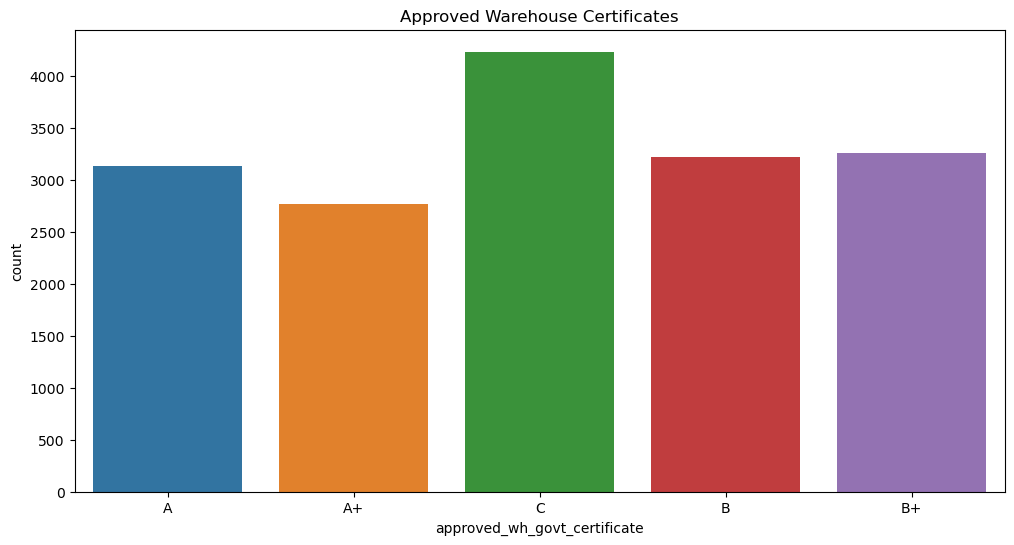

In [35]:
# count plot of the gov.certification
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='approved_wh_govt_certificate')
plt.title('Approved Warehouse Certificates');

The countplot  of approved warehouse certificates, looking at this plot majority of warehouses holding a "C" grade government certificate, indicating that most warehouses have a lower certification level.

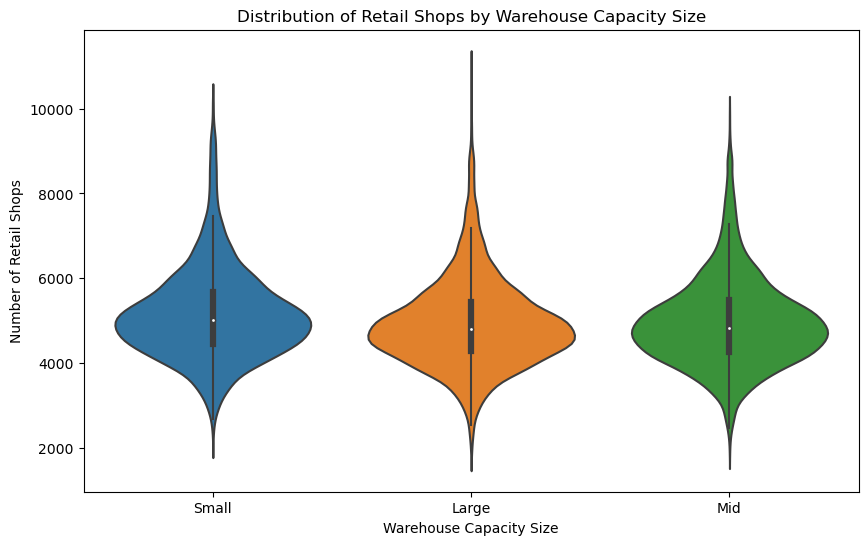

In [36]:
#Distribution of Retail Shop Numbers by Warehouse Capacity Size
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='WH_capacity_size', y='retail_shop_num')
plt.title('Distribution of Retail Shops by Warehouse Capacity Size')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Number of Retail Shops')
plt.show()

The violin plot showcases the distribution of retail shop numbers across various warehouse capacity sizes

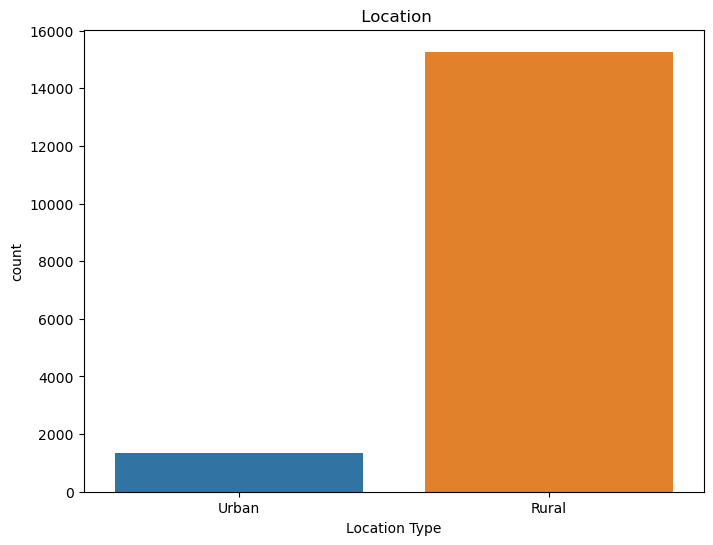

In [37]:
# location types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Location_type')
plt.title(' Location')
plt.xlabel('Location Type')
plt.show()


count plot showing the number of warehouses categorized by their location types (rural or urban)

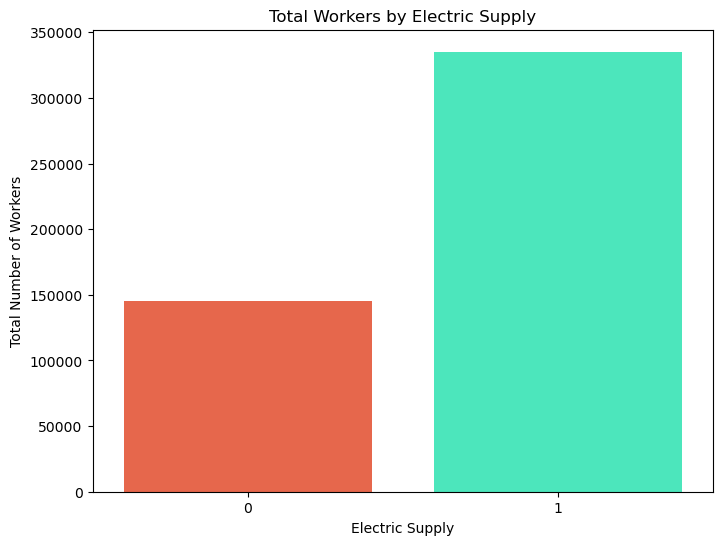

In [38]:
wor = df.groupby('electric_supply')['workers_num'].sum().reset_index()
# Define a custom color palette
custom_palette = ["#FF5733", "#33FFC7"]
plt.figure(figsize=(8, 6))
sns.barplot(data=wor, x='electric_supply', y='workers_num', palette=custom_palette)
plt.title('Total Workers by Electric Supply')
plt.xlabel('Electric Supply')
plt.ylabel('Total Number of Workers')
plt.show()


This bar plot showcases the total count of workers grouped by different types of electric supply available in the warehouses.

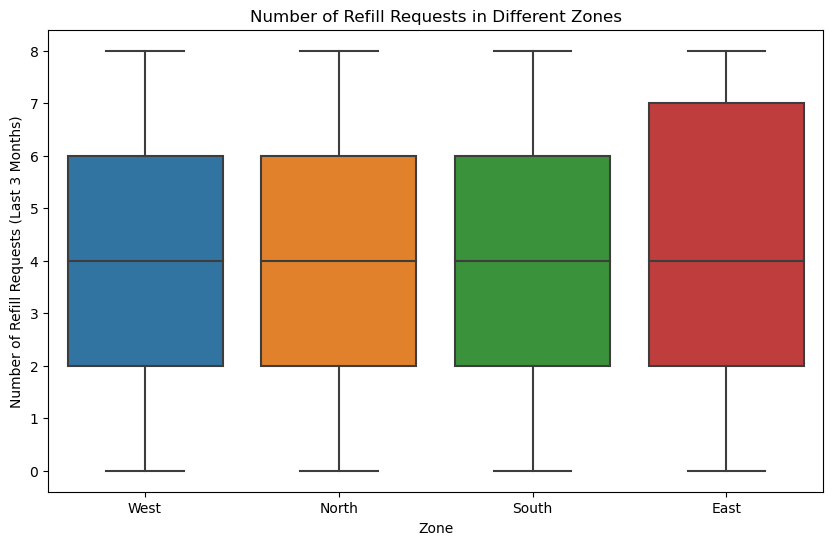

In [39]:
#Number of Refill Requests in Different Zones
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='zone', y='num_refill_req_l3m')
plt.title('Number of Refill Requests in Different Zones')
plt.xlabel('Zone')
plt.ylabel('Number of Refill Requests (Last 3 Months)')
plt.show()

This box plot will  display the distribution of 'refill requests in the last 3 months' across different zones, offering a comparative view of these figures in different warehouse zones.

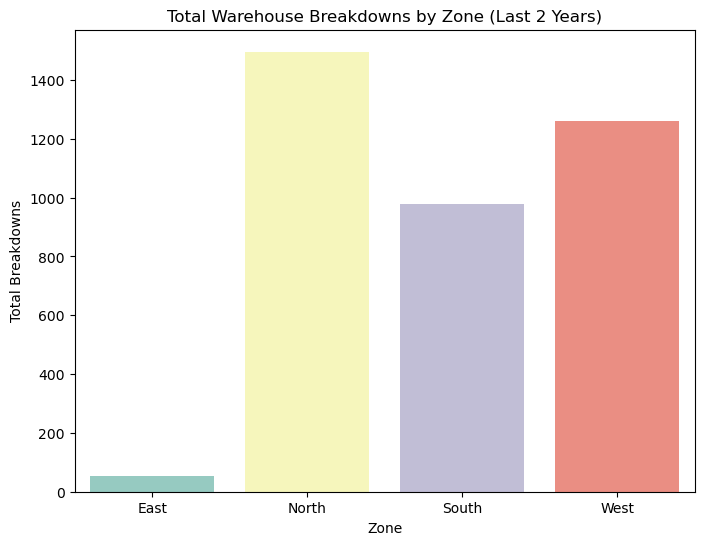

In [40]:
last_two_years = df[df['wh_est_year'] >= 2021] 
breakdown_2years_zone = last_two_years.groupby('zone')['wh_breakdown_l3m'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=breakdown_2years_zone, x='zone', y='wh_breakdown_l3m', palette='Set3')
plt.title('Total Warehouse Breakdowns by Zone (Last 2 Years)')
plt.xlabel('Zone')
plt.ylabel('Total Breakdowns')
plt.show()


Analyzing breakdown incidents in the last two years by zone type showcases the total count of warehouse breakdowns within the last three months, highlighting differences across rural and urban areas

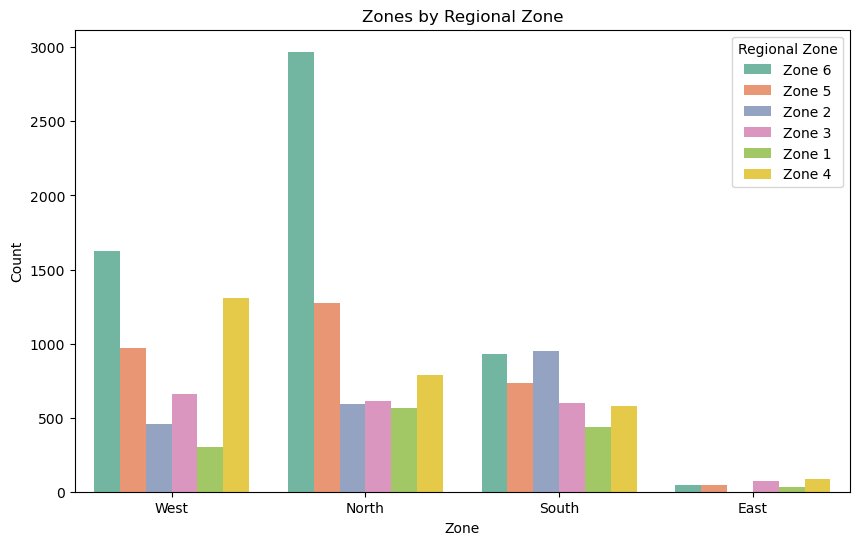

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='zone', hue='WH_regional_zone', palette='Set2')
plt.title('Zones by Regional Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.legend(title='Regional Zone')
plt.show()

This countplot reveals the distribution of warehouse zones across various regional zones. Notably, Regional Zone 6 demonstrates the highest count of warehouses among the regional zones.

In [42]:
df['Regional_zone'] = df['WH_regional_zone'] + ' ' + df['zone']
c_zone = df['Regional_zone'].value_counts()
c_zone

Regional_zone
Zone 6 North    2970
Zone 6 West     1622
Zone 4 West     1307
Zone 5 North    1276
Zone 5 West      973
Zone 2 South     948
Zone 6 South     929
Zone 4 North     785
Zone 5 South     733
Zone 3 West      659
Zone 3 North     610
Zone 3 South     597
Zone 2 North     592
Zone 4 South     581
Zone 1 North     567
Zone 2 West      458
Zone 1 South     435
Zone 1 West      301
Zone 4 East       83
Zone 3 East       71
Zone 6 East       47
Zone 5 East       45
Zone 1 East       31
Name: count, dtype: int64

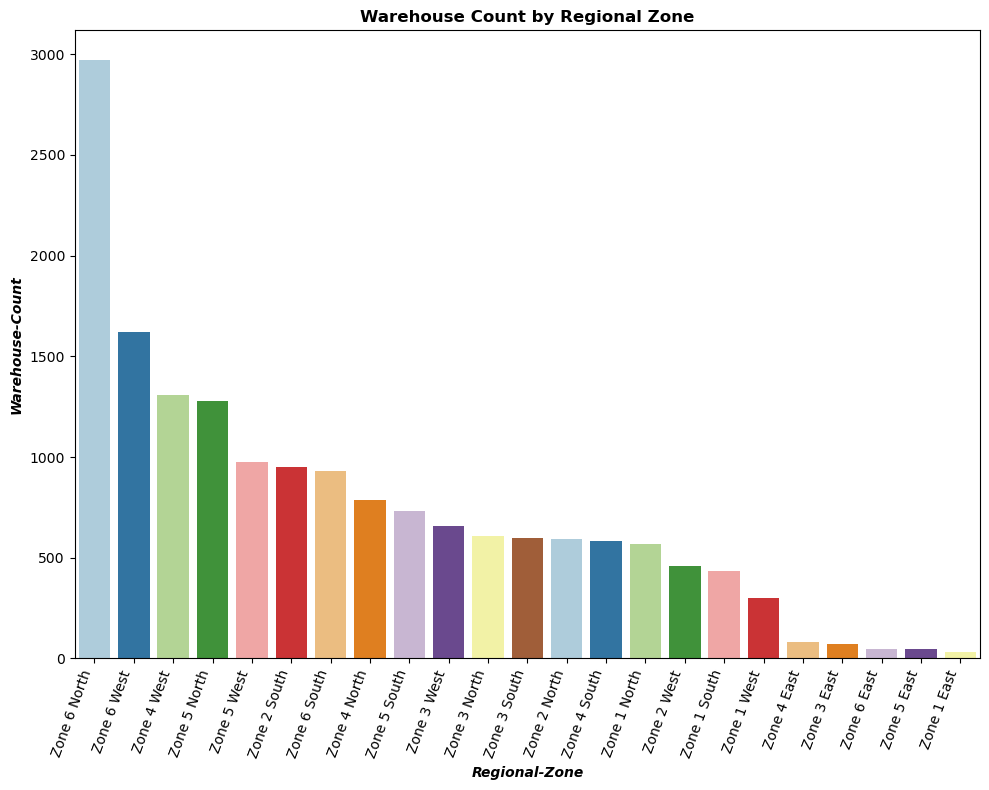

In [43]:
color = sns.color_palette('Paired')
plt.figure(figsize=(10, 8))
sns.barplot(x=c_zone.index, y=c_zone, palette=color)
plt.xticks(rotation=70, ha='right') # rotation for the text 
plt.xlabel('Regional-Zone', fontweight='bold',fontstyle='italic')
plt.ylabel('Warehouse-Count', fontweight='bold',fontstyle='italic')
plt.title('Warehouse Count by Regional Zone', fontweight='bold')
plt.tight_layout()

The majority of warehouses are located in  Zone 6 North, closely followed by  Zone 6 West. This distribution pattern is also reflected in the shipment of products by weight

In [44]:
# Number of Warehouses by Flood Impact and Flood Proof Status
melted_df = df.melt(value_vars=['flood_impacted', 'flood_proof'], var_name='Status',
                    value_name='Count')
melted_df

,Status,Count
0,flood_impacted,0
1,flood_impacted,0
2,flood_impacted,0
3,flood_impacted,0
4,flood_impacted,1
...,...,...
33235,flood_proof,0
33236,flood_proof,0
33237,flood_proof,0
33238,flood_proof,0


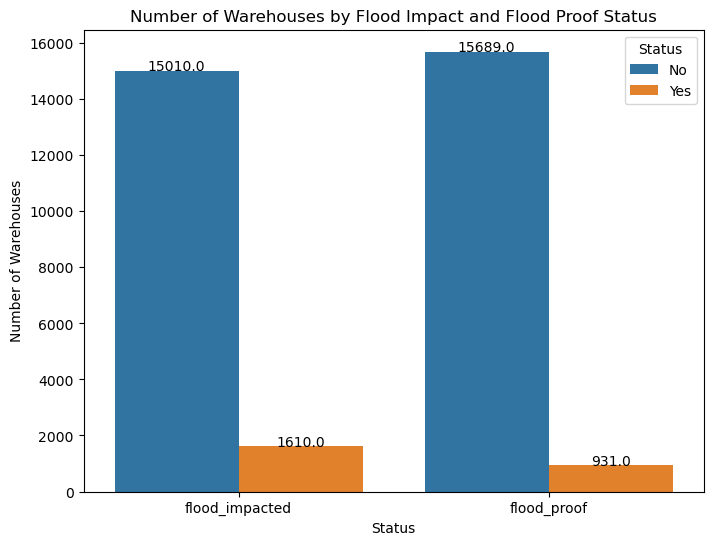

In [45]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=melted_df, x='Status', hue='Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1, height, ha='center')
plt.xlabel('Status')
plt.ylabel('Number of Warehouses')
plt.title('Number of Warehouses by Flood Impact and Flood Proof Status')
plt.legend(title='Status', labels=['No', 'Yes'])
plt.show()

#### ***The count plot show the  warehouse distribution based on flood impact and flood proof status, revealing that out of 16,620 warehouses, 9.7% were impacted by floods while only 5.6% were flood proof.***

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  object 
 1   WH_capacity_size              16620 non-null  object 
 2   zone                          16620 non-null  object 
 3   WH_regional_zone              16620 non-null  object 
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  object 
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

In [47]:
# Separating numerical and categorical columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

In [48]:
# create the sparated columns to dataframe
num_df = df[num_columns]
cat_df = df[cat_columns]

In [49]:
cat_df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate,loc_electr,breakdowns_by_location,Regional_zone
0,Urban,Small,West,Zone 6,Rented,A,1_Urban,5096_Urban,Zone 6 West
1,Rural,Large,North,Zone 5,Company Owned,A,1_Rural,52926_Rural,Zone 5 North
2,Rural,Mid,South,Zone 2,Company Owned,A,0_Rural,52926_Rural,Zone 2 South
3,Rural,Mid,North,Zone 3,Rented,A+,0_Rural,52926_Rural,Zone 3 North
4,Rural,Large,North,Zone 5,Company Owned,C,1_Rural,52926_Rural,Zone 5 North


#### LabelEncoder
Label encoding is a technique used to convert categorical data into numerical values, assigning each category a unique numerical label.

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [51]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,wh_age,workr_ratio,loc_electr,breakdowns_by_location,Regional_zone
0,1,2,3,5,3,1,2,4651,1,24,...,0,0,5,15,17115,22.0,160.379310,3,0,22
1,0,0,1,4,0,0,4,6217,0,47,...,0,0,3,17,5074,8.0,200.548387,2,1,16
2,0,1,2,1,1,0,4,4306,0,64,...,0,0,6,22,23137,2.0,116.378378,0,1,5
3,0,1,1,2,7,4,2,6000,1,50,...,1,1,3,27,22115,20.0,285.714286,0,1,8
4,0,0,1,4,3,1,2,4740,0,42,...,0,4,6,24,24071,14.0,189.600000,2,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,1,0,3,5,3,1,6,4779,1,70,...,0,3,5,23,16094,14.0,251.526316,1,0,22
16616,1,0,1,4,2,0,2,5718,0,26,...,0,3,6,24,21113,19.0,190.600000,3,0,16
16617,0,0,1,5,5,0,4,4514,0,50,...,1,2,5,29,28117,20.0,188.083333,2,1,20
16618,0,2,3,5,3,2,3,5829,1,59,...,0,0,5,15,21103,16.0,201.615344,2,1,22


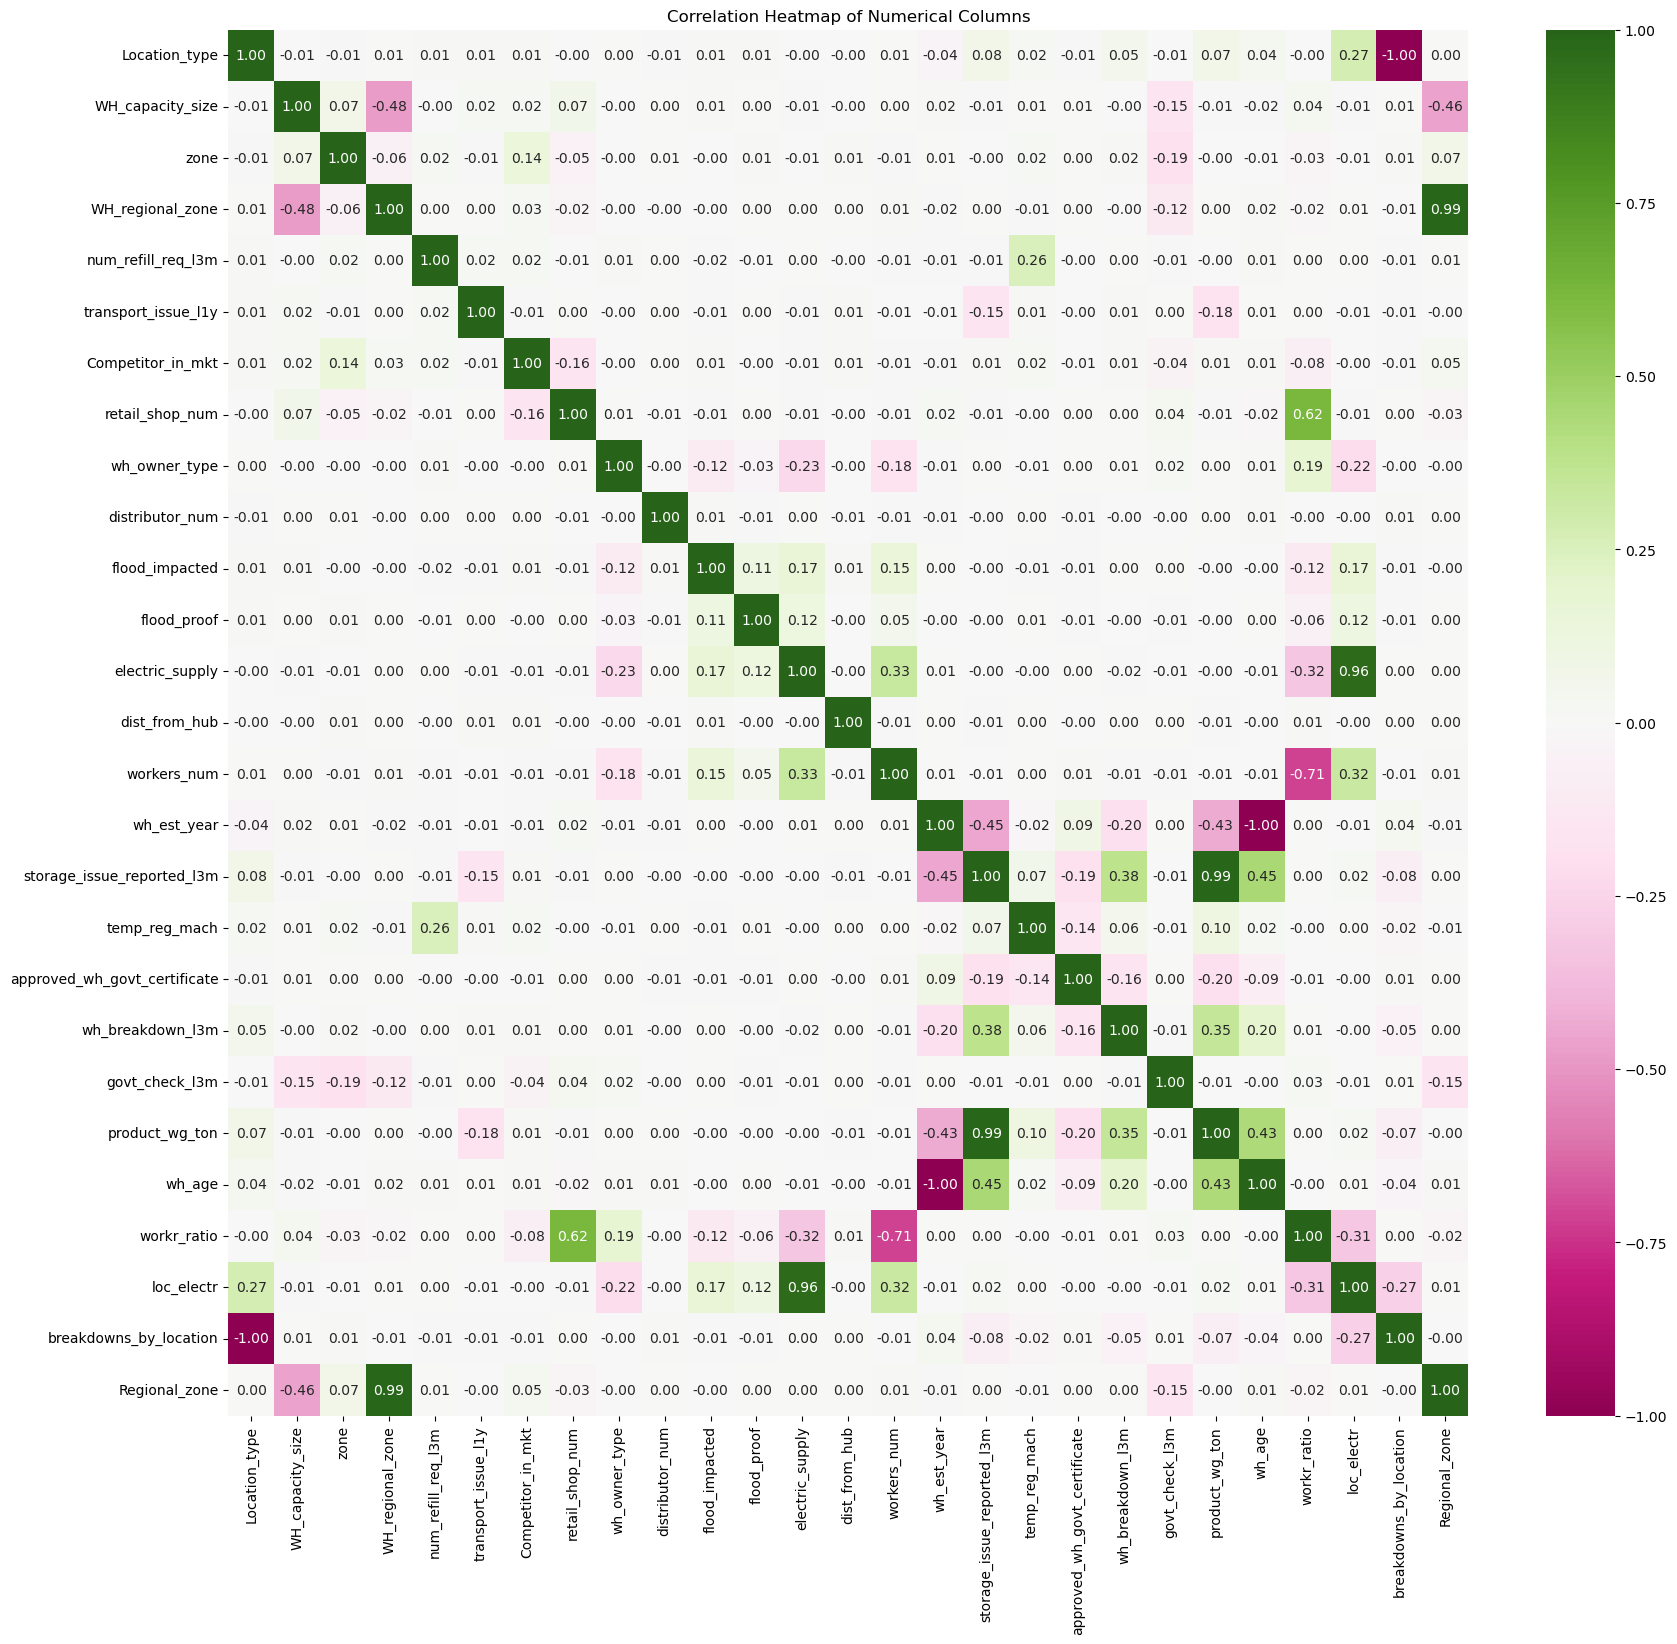

In [52]:
df_corr = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(df_corr, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


from this correlation metric we can the strong positive correlation between storage_issue_reported_l3m and product_wg_ton.

In [53]:
value = 0.05
product_corr = df_corr['product_wg_ton'].abs()  # Absolute correlation with 'product_wg_ton'
high_corr_columns = product_corr[product_corr > value].index.tolist()
high_corr_columns

['Location_type',
 'transport_issue_l1y',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'approved_wh_govt_certificate',
 'wh_breakdown_l3m',
 'product_wg_ton',
 'wh_age',
 'breakdowns_by_location']

In [54]:
# create new dataframe as train df to train data
train_df = df[high_corr_columns]

<Axes: >

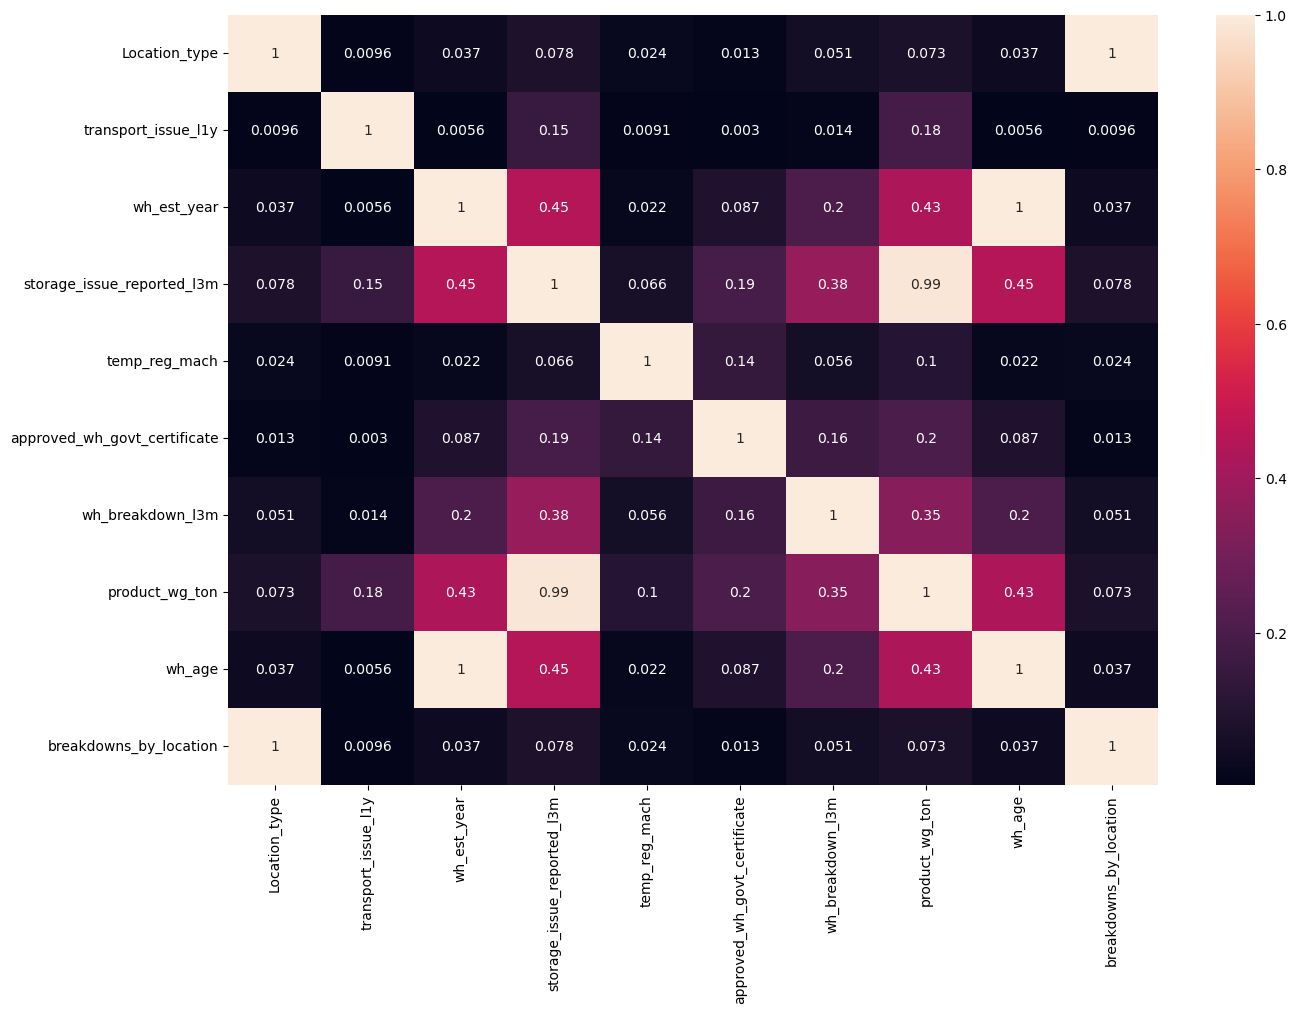

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr().abs(),annot=True)

Dropping
'wh_age' and 'breakdowns_by_location' becz it show  similar correlation to 'product_wg_ton' as 'wh_est_year' and 'Location_type'

dropping these columns potentially reduce  multicollinearity in the dataset

In [56]:
train_df=train_df.drop( ['wh_age','breakdowns_by_location'],axis=1)

In [57]:
# final train_data is ready to train
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  int32  
 1   transport_issue_l1y           16620 non-null  int64  
 2   wh_est_year                   16620 non-null  float64
 3   storage_issue_reported_l3m    16620 non-null  int64  
 4   temp_reg_mach                 16620 non-null  int64  
 5   approved_wh_govt_certificate  16620 non-null  int32  
 6   wh_breakdown_l3m              16620 non-null  int64  
 7   product_wg_ton                16620 non-null  int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 909.0 KB


### Load the Testing Data

In [58]:
df1=pd.read_csv('supply_test.csv')

In [59]:
# test data
f_col=train_df.columns
test_df=df1[f_col]
test_df

,Location_type,transport_issue_l1y,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,product_wg_ton
0,Rural,0,2006.0,24,0,A,2,30132
1,Rural,0,2019.0,5,1,C,2,6075
2,Rural,0,2008.0,19,1,A+,5,24076
3,Rural,2,2017.0,9,1,A+,3,13092
4,Urban,0,1999.0,25,0,B,4,29071
...,...,...,...,...,...,...,...,...
5524,Rural,1,2007.0,22,1,A+,2,29138
5525,Rural,1,NaN,26,0,C,5,33108
5526,Rural,2,NaN,20,0,B+,6,24072
5527,Rural,2,NaN,13,0,B,3,15055


In [60]:
print('Train Data')
train_df.info()
print('========================')
print('Test Data')
test_df.info()

Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  int32  
 1   transport_issue_l1y           16620 non-null  int64  
 2   wh_est_year                   16620 non-null  float64
 3   storage_issue_reported_l3m    16620 non-null  int64  
 4   temp_reg_mach                 16620 non-null  int64  
 5   approved_wh_govt_certificate  16620 non-null  int32  
 6   wh_breakdown_l3m              16620 non-null  int64  
 7   product_wg_ton                16620 non-null  int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 909.0 KB
Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  ---

In [61]:
# testing data have catgorcal columns 

In [62]:
# Separating numerical and categorical columns
num_columns1 = test_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns1 = test_df.select_dtypes(include=['object']).columns.tolist()

In [63]:
# create the sparated columns to dataframe
num_df1 = test_df[num_columns1]
cat_df1= test_df[cat_columns1]

In [64]:
label_encoder = LabelEncoder()
for col in cat_columns1:
    test_df[col] = label_encoder.fit_transform(test_df[col])

C:\Users\Asus\AppData\Local\Temp\ipykernel_16672\3889678124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = label_encoder.fit_transform(test_df[col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16672\3889678124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = label_encoder.fit_transform(test_df[col])


In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 5529 non-null   int32  
 1   transport_issue_l1y           5529 non-null   int64  
 2   wh_est_year                   2844 non-null   float64
 3   storage_issue_reported_l3m    5529 non-null   int64  
 4   temp_reg_mach                 5529 non-null   int64  
 5   approved_wh_govt_certificate  5529 non-null   int32  
 6   wh_breakdown_l3m              5529 non-null   int64  
 7   product_wg_ton                5529 non-null   int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 302.5 KB


In [66]:
test_df.isnull().sum()

Location_type                      0
transport_issue_l1y                0
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate       0
wh_breakdown_l3m                   0
product_wg_ton                     0
dtype: int64

In [67]:
# Get the index of remaining null values
null_indx1 = test_df[test_df['wh_est_year'].isnull()].index
for index in null_indx1:
    r_year = random.choice(range(1996, 2024))  
    test_df.at[index, 'wh_est_year'] = r_year

In [68]:
test_df.isnull().sum()

Location_type                   0
transport_issue_l1y             0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
product_wg_ton                  0
dtype: int64

#### Splitting the train_df and test_df into features and target variable

In [69]:
X_train = train_df.drop('product_wg_ton', axis = 1)
y_train = train_df['product_wg_ton']

X_test = test_df.drop('product_wg_ton', axis = 1)
y_test = test_df['product_wg_ton']

In [70]:
X_train.shape,X_test.shape

((16620, 7), (5529, 7))

### Building Model  

In [71]:
# object crreation for the algorthims
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svm = SVR()
xgb = XGBRegressor()

In [72]:
# Object creation for the evaluation metrics
mae = mean_absolute_error  # Mean Absolute Error
mse = mean_squared_error  # Mean Squared Error
r2 = r2_score  # R-squared Score

In [75]:
a = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf,
                      'Gradient Boosting': gb, 'Support Vector Machine': svm, 'XGBoost': xgb}

for name, model in a.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae_result = mae(y_test, y_pred)
    mse_result = mse(y_test, y_pred)
    r2_result = r2(y_test, y_pred)
    
    # Print evaluation metrics with styled formatting
    print(f"{name} Evaluation Metrics: -- Results --{rs.italic}")
    print('================================================')
    print(f"{bg.black}{fg.white}Mean Absolute Error (MAE): {fg.yellow}{mae_result:.4f}")
    print(f"{bg.black}{fg.white}Mean Squared Error (MSE): {fg.yellow}{mse_result:.4f}")
    print(f"{bg.black}{fg.white}R-squared Score (R2): {fg.yellow}{r2_result:.4f}{rs.all}")
    print('')


Linear Regression Evaluation Metrics: -- Results --
Mean Absolute Error (MAE): 1299.9551
Mean Squared Error (MSE): 3119596.9403
R-squared Score (R2): 0.9770

Decision Tree Evaluation Metrics: -- Results --
Mean Absolute Error (MAE): 771.2642
Mean Squared Error (MSE): 1299467.3815
R-squared Score (R2): 0.9904

Random Forest Evaluation Metrics: -- Results --
Mean Absolute Error (MAE): 690.0176
Mean Squared Error (MSE): 903888.7051
R-squared Score (R2): 0.9933

Gradient Boosting Evaluation Metrics: -- Results --
Mean Absolute Error (MAE): 677.0715
Mean Squared Error (MSE): 805277.1301
R-squared Score (R2): 0.9941

Support Vector Machine Evaluation Metrics: -- Results --
Mean Absolute Error (MAE): 9612.9720
Mean Squared Error (MSE): 135583288.0584
R-squared Score (R2): 0.0001

XGBoost Evaluation Metrics: -- Results --
Mean Absolute Error (MAE): 654.6813
Mean Squared Error (MSE): 778611.8524
R-squared Score (R2): 0.9943



Among the different models tested, Gradient Boosting and XGBoost stand out for their accuracy in predicting product weight, resulting in fewer errors compared to other models. This precision suggests that these models could be dependable for managing product shipment quantities and addressing the gap between demand and supply effectively


#### plot for the actual value  vs predicted value for each algorithm 

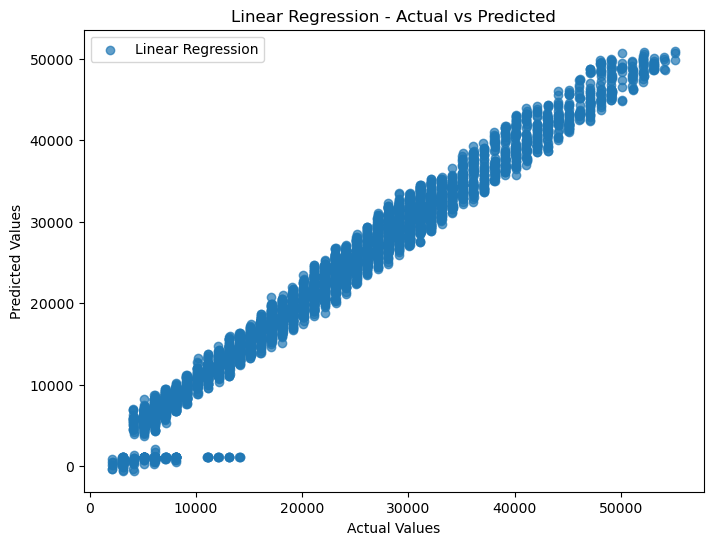

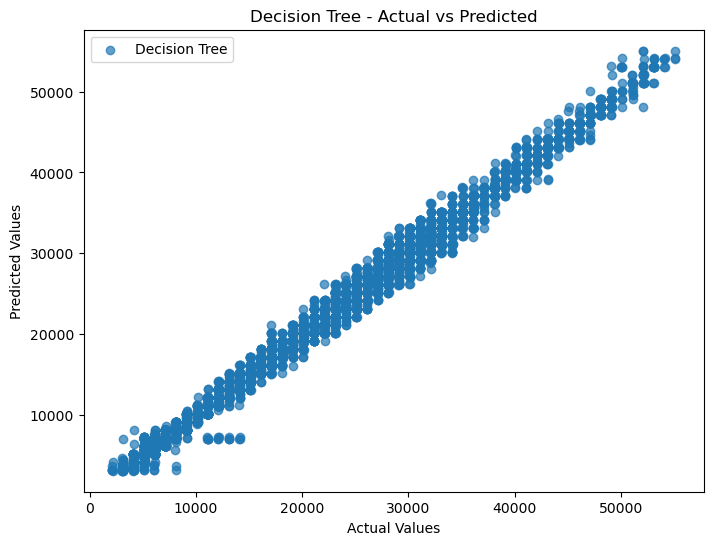

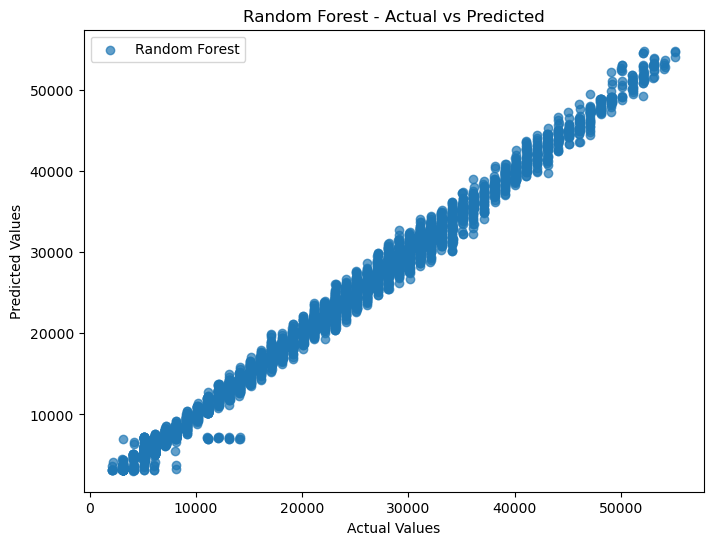

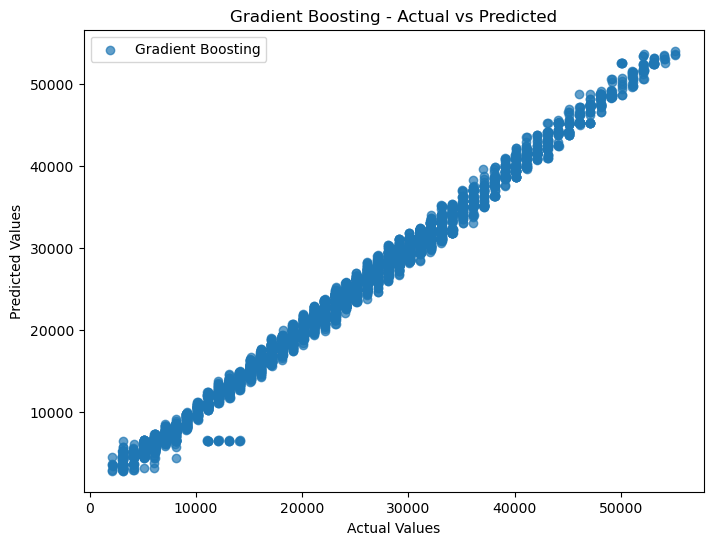

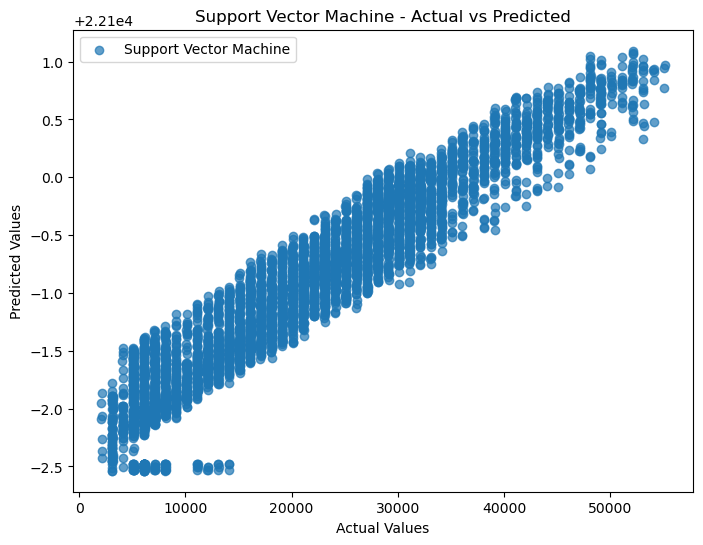

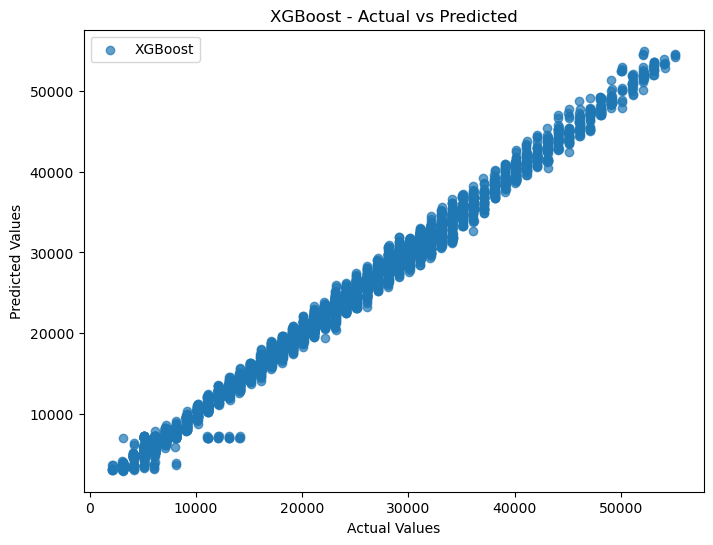

In [76]:
# create scatter plots  actual value  vs predicted value for each algorithm 
for name, model in a.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, label=name, alpha=0.7)  
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.show()

Comparing the scatter plot. we can see the difference  in the SVM's behavior compared to the others algorthms 

## Project Overview:
#
#### Exploratory Analysis:

- Conducted an in-depth analysis of the dataset to understand its structure, distributions, and attributes.
#### Creation of New Attributes:

- Engineered new features based on existing data attributes to enhance predictive capabilities.
#### Data Preprocessing:

- Cleaned and preprocessed the dataset, handling missing values, outliers, and standardizing or normalizing features as required.
#### Exploratory Data Analysis (EDA):

- Explored relationships between variables, identified trends, patterns, and outliers to gain valuable insights into the dataset.
#### Visualization:

- Employed various visualization techniques to represent data distributions, correlations, and trends effectively.
#### Label Encoding:

- Converted categorical columns into numerical format using label encoding for model compatibility.
#### Correlation Analysis:

- Investigated attribute correlations to understand the relationships between different features.
#### Train-Test Split:

- Segregated the dataset into training and testing sets for model training and evaluation.
#### Algorithm Selection:

- Chose a variety of regression algorithms (Linear Regression, Decision Trees, Random Forest, Gradient Boosting, Support Vector Machine, XGBoost) to build predictive models.
#### Model Training & Evaluation:

- Trained models on the training data, performed hyperparameter tuning, and evaluated their performance using various metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared scores.
#### Visualization of Model Performance:

- Visualized model predictions against actual values using scatter plots to compare algorithm behaviors.
#### Conclusion:

- The analysis highlights Gradient Boosting and XGBoost models as strong performers due to their accurate and robust performance in managing inventory dynamically. Improving the Support Vector Machine through fine-tuning parameters could further enhance supply chain strategies.